In [168]:
import pandas as pd 

In [169]:
data = pd.read_csv("./movie.csv")
data.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [170]:
data.Genre.value_counts()
#  what is most frequent genre of movies realeased on netflix 
#  drama

Genre
Drama                                   466
Comedy                                  403
Drama, Romance                          248
Horror                                  238
Horror, Thriller                        199
                                       ... 
Animation, Horror, Action, Comedy         1
Comedy, Animation, Family, Adventure      1
Comedy, Crime, Music                      1
Adventure, Documentary                    1
Comedy, Animation, Adventure, Horror      1
Name: count, Length: 2337, dtype: int64

In [171]:
data.Vote_Count.isnull().sum()

np.int64(10)

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [173]:
data.duplicated().sum()

np.int64(0)

In [174]:
data.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


In [175]:
# in describe [Popularity	Vote_Count	Vote_Average] has to show but 	Vote_Count	Vote_Average cols are object datatype so
# we have to convert that into int


In [176]:
# # Remove any unwanted spaces from column names
data.columns = data.columns.str.strip()

# # Convert columns from object to int
data["Vote_Average"] = pd.to_numeric(data["Vote_Average"], errors='coerce').astype('float64')
data["Vote_Count"] = pd.to_numeric(data["Vote_Count"], errors='coerce').astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9826 non-null   float64
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(3), object(6)
memory usage: 691.8+ KB


In [177]:
data.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9826.000000,9826.000000
mean,40.320570,1392.943721,6.439467
std,108.874308,2611.303856,1.129797
min,7.100000,0.000000,0.000000
25%,16.127500,146.000000,5.900000
50%,21.191000,444.000000,6.500000
75%,35.174500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [178]:
data.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [179]:
data = data.drop(['Original_Language','Poster_Url','Overview'],axis=1)


In [180]:
data.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [181]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940.0,8.3,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151.0,8.1,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122.0,6.3,Thriller
3,2021-11-24,Encanto,2402.201,5076.0,7.7,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793.0,7.0,"Action, Adventure, Thriller, War"


In [182]:
data.info()
# realeased date is in object format but i need too coonvert it into dateNtime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Date  9837 non-null   object 
 1   Title         9828 non-null   object 
 2   Popularity    9827 non-null   float64
 3   Vote_Count    9826 non-null   float64
 4   Vote_Average  9826 non-null   float64
 5   Genre         9826 non-null   object 
dtypes: float64(3), object(3)
memory usage: 461.2+ KB


In [183]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'], errors='coerce')
data['Release_Date'].dtype

dtype('<M8[ns]')

In [184]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Release_Date  9827 non-null   datetime64[ns]
 1   Title         9828 non-null   object        
 2   Popularity    9827 non-null   float64       
 3   Vote_Count    9826 non-null   float64       
 4   Vote_Average  9826 non-null   float64       
 5   Genre         9826 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 461.2+ KB


In [185]:
# # only years i need
data['Release_Date'] = data['Release_Date'].dt.year.astype("Int64")

In [186]:
data.head() 


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151.0,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122.0,6.3,Thriller
3,2021,Encanto,2402.201,5076.0,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793.0,7.0,"Action, Adventure, Thriller, War"


In [187]:
def categorized_col(df,col,labels):
    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
]
    df["rating"] = pd.cut(df[col],edges,labels=labels,duplicates='drop') 
    return df

In [188]:
labels=['4th','3rd','2nd','1st']
categorized_col(data,"Vote_Average",labels)


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,rating
0,2021,Spider-Man: No Way Home,5083.954,8940.0,8.3,"Action, Adventure, Science Fiction",1st
1,2022,The Batman,3827.658,1151.0,8.1,"Crime, Mystery, Thriller",1st
2,2022,No Exit,2618.087,122.0,6.3,Thriller,3rd
3,2021,Encanto,2402.201,5076.0,7.7,"Animation, Comedy, Family, Fantasy",1st
4,2021,The King's Man,1895.511,1793.0,7.0,"Action, Adventure, Thriller, War",2nd
...,...,...,...,...,...,...,...
9832,1973,Badlands,13.357,896.0,7.6,"Drama, Crime",1st
9833,2020,Violent Delights,13.356,8.0,3.5,Horror,4th
9834,2016,The Offering,13.355,94.0,5.0,"Mystery, Thriller, Horror",4th
9835,2021,The United States vs. Billie Holiday,13.354,152.0,6.7,"Music, Drama, History",2nd


In [189]:
data.rating.value_counts()

rating
4th    2467
1st    2450
2nd    2411
3rd    2398
Name: count, dtype: int64

In [190]:
# we'd split genre into list and explore our dataframe to have only one genre per row each movie

data['Genre'] = data['Genre'].str.split(', ')
data = data.explode('Genre').reset_index(drop=True)


In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25803 entries, 0 to 25802
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  Int64   
 1   Title         25794 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25792 non-null  float64 
 4   Vote_Average  25792 non-null  float64 
 5   Genre         25792 non-null  object  
 6   rating        25551 non-null  category
dtypes: Int64(1), category(1), float64(3), object(2)
memory usage: 1.2+ MB


In [192]:
data.nunique()

Release_Date     102
Title           9514
Popularity      8160
Vote_Count      3266
Vote_Average      74
Genre             19
rating             4
dtype: int64

In [193]:
# casting col into category
data["Genre"] = data['Genre'].astype('category')

In [194]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,rating
0,2021,Spider-Man: No Way Home,5083.954,8940.0,8.3,Action,1st
1,2021,Spider-Man: No Way Home,5083.954,8940.0,8.3,Adventure,1st
2,2021,Spider-Man: No Way Home,5083.954,8940.0,8.3,Science Fiction,1st
3,2022,The Batman,3827.658,1151.0,8.1,Crime,1st
4,2022,The Batman,3827.658,1151.0,8.1,Mystery,1st


In [195]:
data.Genre.info()

<class 'pandas.core.series.Series'>
RangeIndex: 25803 entries, 0 to 25802
Series name: Genre
Non-Null Count  Dtype   
--------------  -----   
25792 non-null  category
dtypes: category(1)
memory usage: 26.0 KB


In [196]:
data.dtypes

Release_Date       Int64
Title             object
Popularity       float64
Vote_Count       float64
Vote_Average     float64
Genre           category
rating          category
dtype: object

# All data preprocessing / Cleaning done 
# now data is ready to vizualise

## now vissualizing data and shoeing visuals to company as outcomes

In [197]:
# What is the most frequent genre of movies released on Netflix?

# What genres has highest votes?

# What movie got the highest popularity? What's its genre?

# What movie got the lowest popularity? What's its genre?

# Which year has the most filmed movies?

import seaborn as sns
import matplotlib.pyplot as plt

In [198]:
sns.set_style("whitegrid")


In [199]:
# What is the most frequent genre of movies released on Netflix?
data.Genre.describe() # show drama


count     25792
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

<Axes: xlabel='count', ylabel='Genre'>

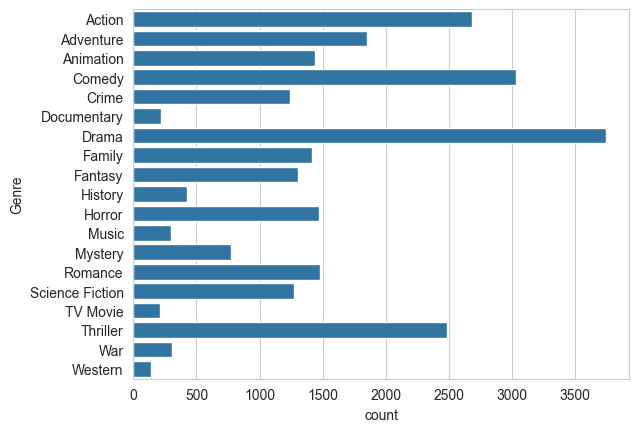

In [200]:
sns.countplot(y='Genre',data=data)

Text(0.5, 1.0, 'Genre Column Distribution')

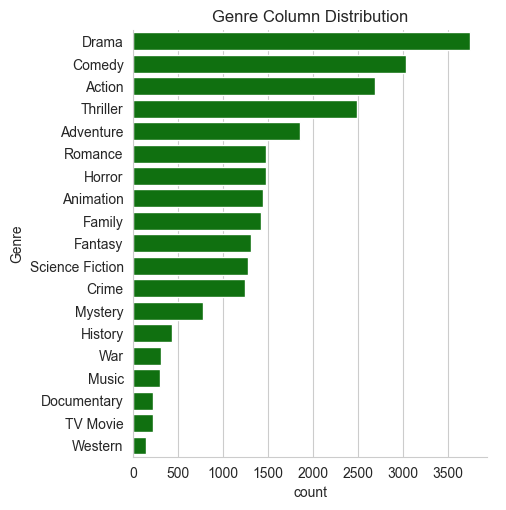

In [201]:
# catplot --> used for categorized plot

sns.catplot(y="Genre",data=data,kind='count',
            order=data.Genre.value_counts().index
            ,color='Green'
             )
plt.title("Genre Column Distribution")



In [202]:
# What genres has highest votes?
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,rating
0,2021,Spider-Man: No Way Home,5083.954,8940.0,8.3,Action,1st
1,2021,Spider-Man: No Way Home,5083.954,8940.0,8.3,Adventure,1st
2,2021,Spider-Man: No Way Home,5083.954,8940.0,8.3,Science Fiction,1st
3,2022,The Batman,3827.658,1151.0,8.1,Crime,1st
4,2022,The Batman,3827.658,1151.0,8.1,Mystery,1st


In [203]:
data.Vote_Count.describe() # 31077.000000

count    25792.000000
mean      1504.881514
std       2743.047498
min          0.000000
25%        166.000000
50%        490.000000
75%       1501.000000
max      31077.000000
Name: Vote_Count, dtype: float64

<Axes: xlabel='Vote_Count', ylabel='Genre'>

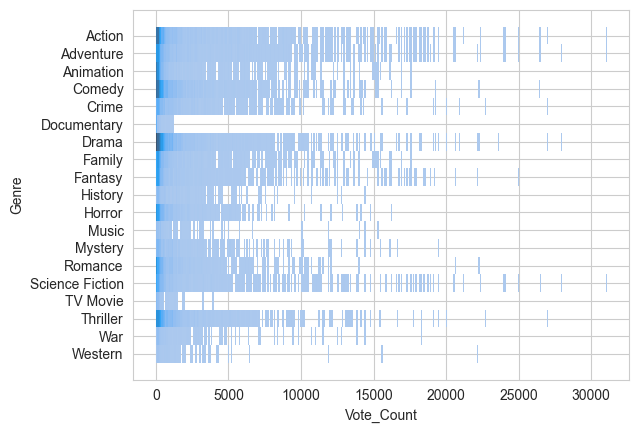

In [204]:
sns.histplot(x="Vote_Count",y="Genre",data=data)

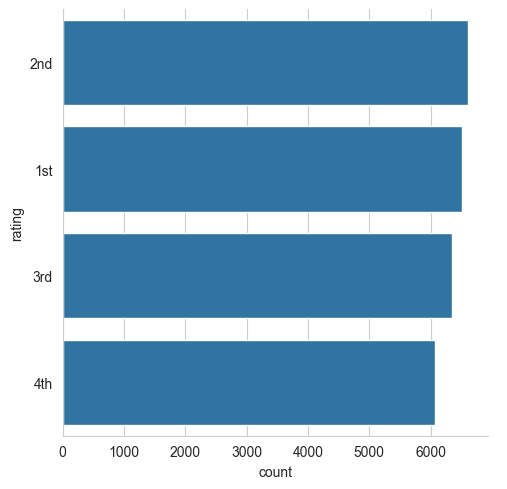

In [205]:
sns.catplot(y="rating",data=data,kind='count',
            order=data["rating"].value_counts().index)

In [206]:
# What movie got the highest popularity? What's its genre?


data.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,rating
0,2021,Spider-Man: No Way Home,5083.954,8940.0,8.3,Action,1st
1,2021,Spider-Man: No Way Home,5083.954,8940.0,8.3,Adventure,1st


In [207]:
data['Popularity'].describe()['max']

np.float64(5083.954)

In [208]:
# sns.catplot(y="Popularity",data=data,kind='count') ---> Wrong / no need to draw graph
data[data['Popularity'] == data['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,rating
0,2021,Spider-Man: No Way Home,5083.954,8940.0,8.3,Action,1st
1,2021,Spider-Man: No Way Home,5083.954,8940.0,8.3,Adventure,1st
2,2021,Spider-Man: No Way Home,5083.954,8940.0,8.3,Science Fiction,1st


In [209]:
# What movie got the lowest popularity? What's its genre?
data[data['Popularity'] == data['Popularity'].min()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,rating
3144,<NA>,61.328,7.1,NaN,NaN,NaN,NaN


In [210]:
# we just need to clean the data

data.isnull().sum()


Release_Date     10
Title             9
Popularity       10
Vote_Count       11
Vote_Average     11
Genre            11
rating          252
dtype: int64

In [211]:
data.shape

(25803, 7)

In [212]:
percentage = (252 / 25803) * 100
print(percentage)
# there willl noo affect if we remove the 0.97% data

0.9766306243460063


In [ ]:
data = data.dropna()

In [214]:
data.isnull().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
rating          0
dtype: int64

In [217]:
# What movie got the lowest popularity? What's its genre?


data[data['Popularity'] == data['Popularity'].min()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,rating
25797,2021,The United States vs. Billie Holiday,13.354,152.0,6.7,Music,2nd
25798,2021,The United States vs. Billie Holiday,13.354,152.0,6.7,Drama,2nd
25799,2021,The United States vs. Billie Holiday,13.354,152.0,6.7,History,2nd
25800,1984,Threads,13.354,186.0,7.8,War,1st
25801,1984,Threads,13.354,186.0,7.8,Drama,1st
25802,1984,Threads,13.354,186.0,7.8,Science Fiction,1st


<Axes: xlabel='count', ylabel='Release_Date'>

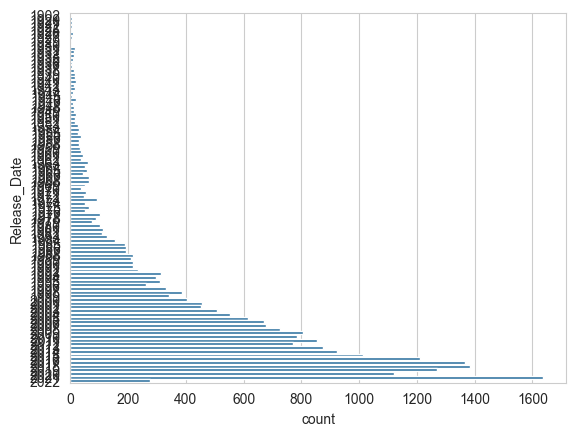

In [226]:
# Which year has the most filmed movies?

sns.countplot(y='Release_Date',data=data)  # -----> Not a good way 

<Axes: >

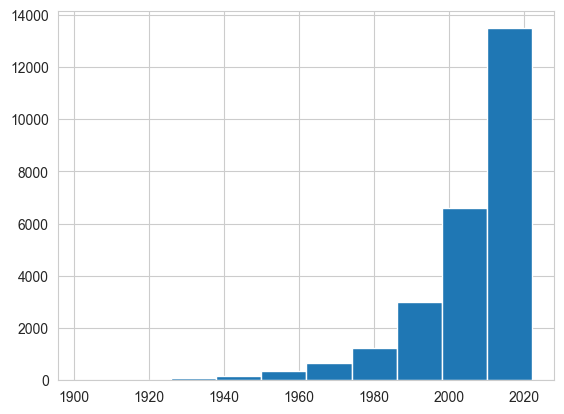

In [247]:
data['Release_Date'].hist()  # -----> Correct


In [243]:
(data['Release_Date'] == 2020).sum()


np.int64(1121)

In [248]:
data[data['Release_Date'] == 2020].shape


(1121, 7)

In [255]:
data[data==0].value_counts()

Series([], Name: count, dtype: int64)